<a href="https://colab.research.google.com/github/maheshkumar30/Intellipaat-DataScience/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link: https://drive.google.com/file/d/1aNH7c_wJxJLaXtnJPDcVKjRKCfc-ZRTt/view?usp=sharing

**Importing Mandatory Ones**

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Config Library**

In [101]:
import warnings  # Warning are not error
warnings.filterwarnings('ignore')

**Read Dataset**

In [102]:
df = pd.read_csv('bank-additional-full.csv',sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [104]:
df.shape

(41199, 21)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

**Insight**
* There are some Null Values
* Data encoding is Needed

**Statistical Summary**

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41195.0,40.030319,10.431818,17.000,32.000,38.000,47.000,98.000
duration,41196.0,258.281265,259.254211,0.000,102.000,180.000,319.000,4918.000
campaign,41196.0,2.567676,2.769751,1.000,1.000,2.000,3.000,56.000
pdays,41196.0,962.482547,186.893451,0.000,999.000,999.000,999.000,999.000
previous,41196.0,0.173124,0.494987,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41196.0,0.081656,1.570894,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41195.0,93.575867,0.578999,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41196.0,-40.504600,4.629972,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41196.0,3.620787,1.734655,0.634,1.344,4.857,4.961,5.045
nr.employed,41196.0,5166.996405,72.300104,4963.600,5099.100,5191.000,5228.100,5228.100


In [107]:
df.describe(include='O').T

,count,unique,top,freq
job,41194,12,admin.,10422
marital,41194,4,married,24934
education,41194,8,university.degree,12168
default,41195,3,no,32595
housing,41196,3,yes,21584
loan,41195,3,no,33957
contact,41195,2,cellular,26151
month,41196,10,may,13769
day_of_week,41196,5,thu,8623
poutcome,41194,3,nonexistent,35563


**Data Cleaning**

In [108]:
df.isnull().sum().sum()

np.int64(76)

In [109]:
df.dropna(inplace = True)

In [110]:
df.duplicated().sum()

np.int64(13)

In [111]:
df[df.duplicated() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39.0,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36.0,retired,married,unknown,no,no,no,telephone,jul,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27.0,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47.0,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32.0,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55.0,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41.0,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39.0,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24.0,services,single,high.school,no,yes,no,cellular,apr,tue,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35.0,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [112]:
df.drop_duplicates(inplace = True)

In [113]:
df.shape

(41177, 21)

**Outlier Analysis**

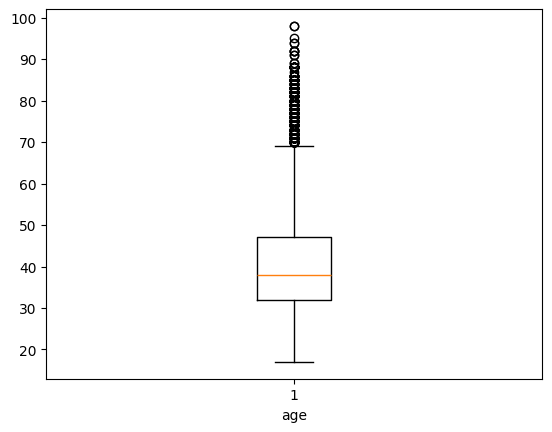

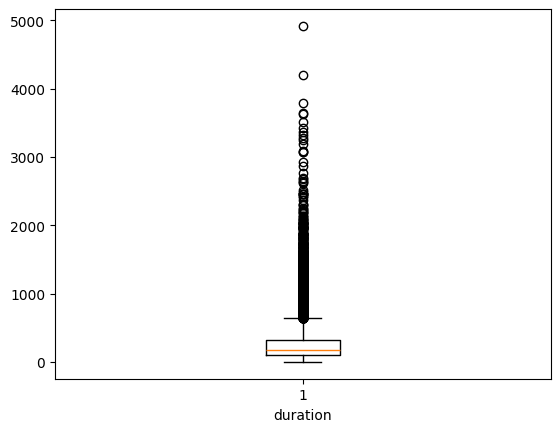

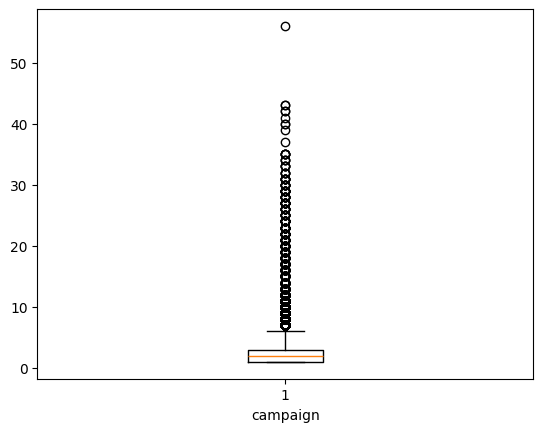

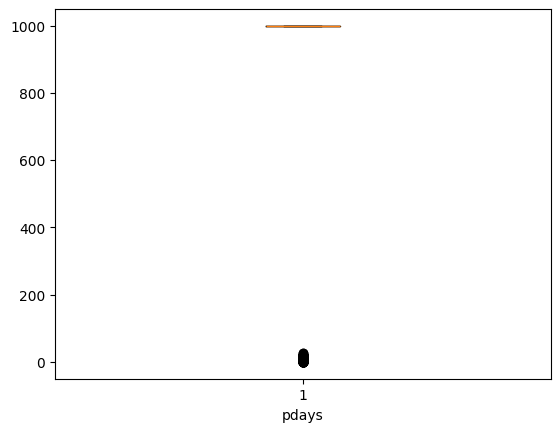

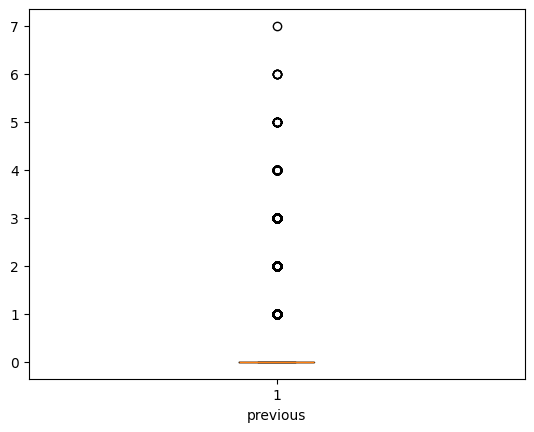

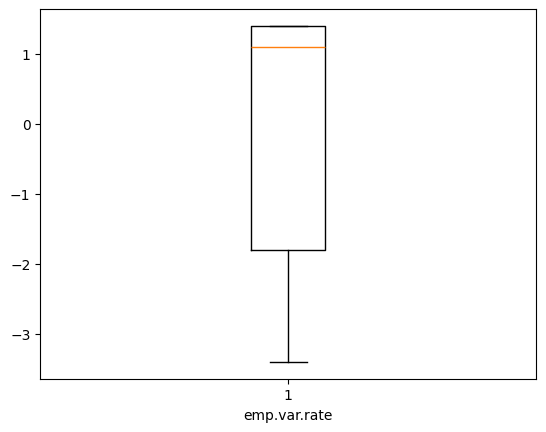

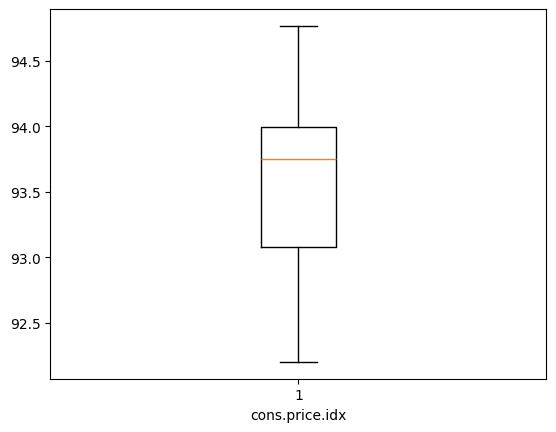

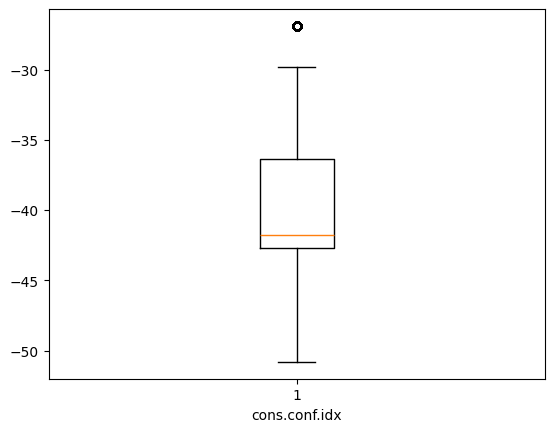

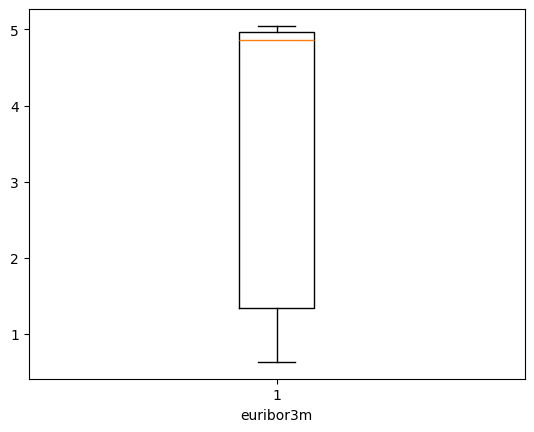

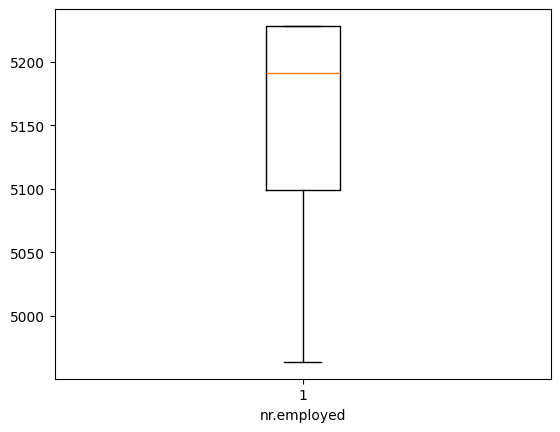

In [114]:
col_list = df.columns

for x in col_list:
  if df[x].dtype != 'object':
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.show()

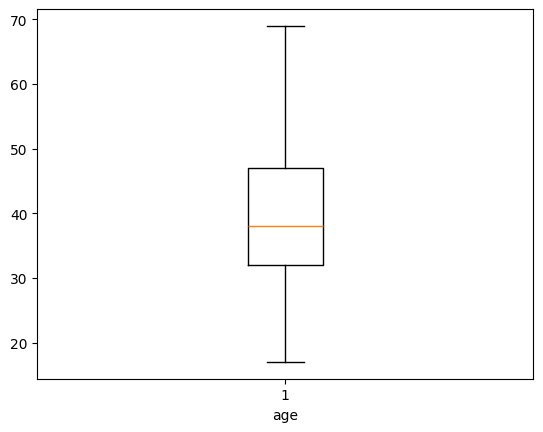

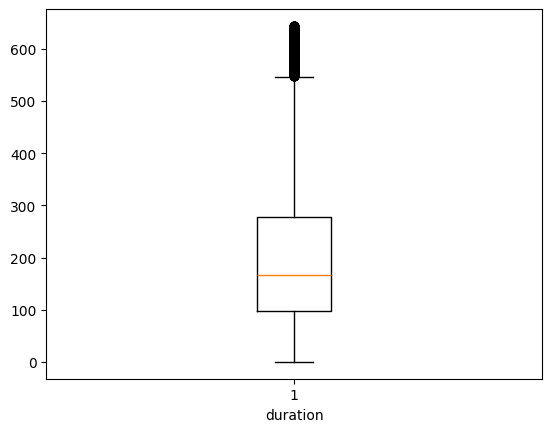

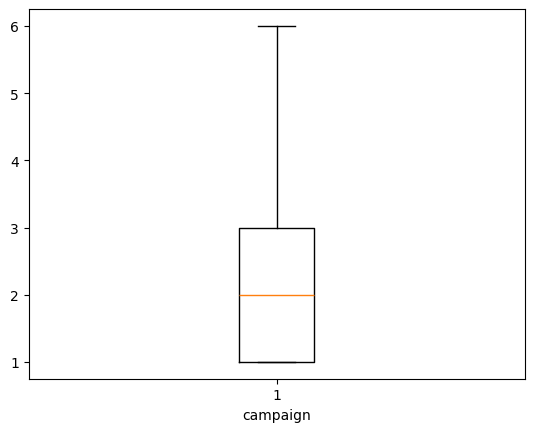

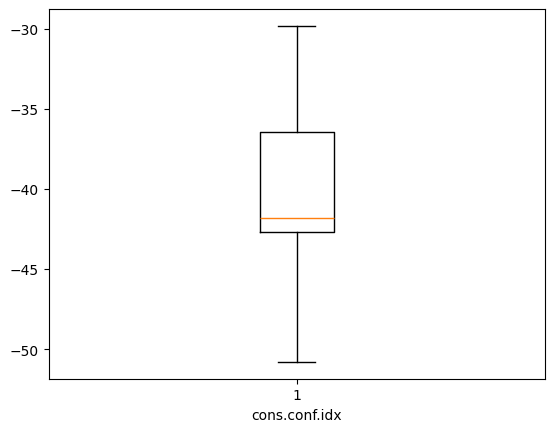

In [115]:
out_col = ['age','duration','campaign','cons.conf.idx']

for x in out_col:
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)
  IQR = Q3 - Q1
  LF = Q1 - (1.5*IQR)
  UF = Q3 + (1.5*IQR)
# Keep the values between UF and LF
  df = df[(df[x]>=LF) & (df[x]<=UF)]

  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.show()

**Feature Selection**
* Correlation
* VIF
* RFE

**Correlation**

In [116]:
corrMat = df.select_dtypes(include = ['number']).corr()
corrMat

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.002694,0.012643,0.004257,-0.023142,0.076681,0.041054,0.102274,0.088340,0.074006
duration,0.002694,1.000000,-0.057019,-0.073896,0.045881,-0.051410,0.001239,-0.002723,-0.059857,-0.078508
campaign,0.012643,-0.057019,1.000000,0.042143,-0.057057,0.089231,0.067005,-0.005738,0.074475,0.084622
pdays,0.004257,-0.073896,0.042143,1.000000,-0.574387,0.261084,0.064616,-0.072250,0.288853,0.368947
previous,-0.023142,0.045881,-0.057057,-0.574387,1.000000,-0.420205,-0.200631,-0.088675,-0.453358,-0.502100
emp.var.rate,0.076681,-0.051410,0.089231,0.261084,-0.420205,1.000000,0.767724,0.309361,0.972554,0.901892
cons.price.idx,0.041054,0.001239,0.067005,0.064616,-0.200631,0.767724,1.000000,0.149011,0.681468,0.503772
cons.conf.idx,0.102274,-0.002723,-0.005738,-0.072250,-0.088675,0.309361,0.149011,1.000000,0.373525,0.200479
euribor3m,0.088340,-0.059857,0.074475,0.288853,-0.453358,0.972554,0.681468,0.373525,1.000000,0.943603
nr.employed,0.074006,-0.078508,0.084622,0.368947,-0.502100,0.901892,0.503772,0.200479,0.943603,1.000000


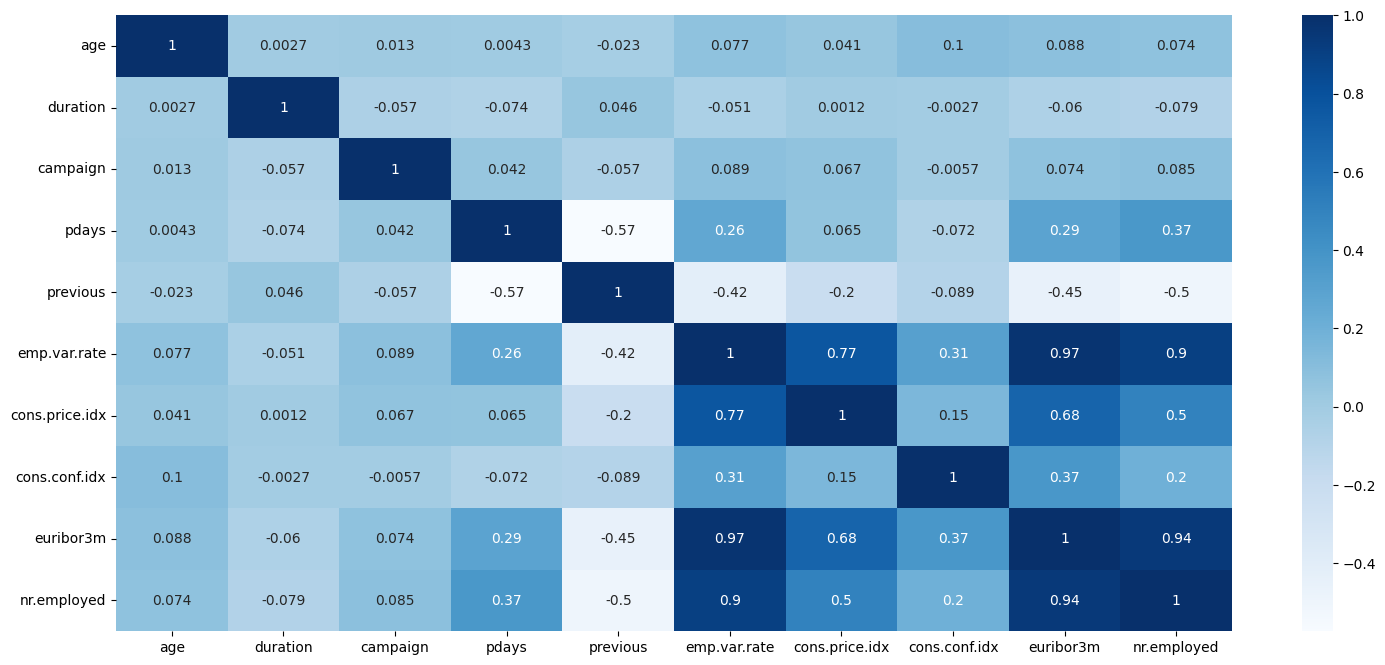

In [117]:
fig = plt.figure(figsize= (18,8))
sns.heatmap(corrMat, annot = True, cmap = 'Blues')
plt.show()

**Variance Inflation Factor (multicollinearity)**

VIf will tell us how much a particular independent column(x1,x2) is correlated with other independent column (Under the hood we use a regression model)

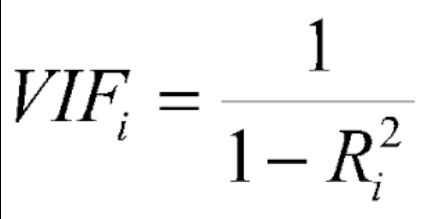

* VIF score = 1 (Ideal dependent feature)
* VIF Score <=5 (good Feature)
* VIF Score >=6 (Multicollinearity feature) --> Remove

In [118]:
df2 = df

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [120]:
num_col = []

for x in df2.columns:
  if df[x].dtype == 'float64':
    num_col.append(x)
num_col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

**Steps to implement VIF**
* We will check VIF Score of columns
* Maximum VIF Score column we will drop
* We iterate it againg to check updated VIF score for other columns

In [121]:
x = df[num_col]

In [122]:
x.values

array([[ 5.6000e+01,  2.6100e+02,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 5.7000e+01,  1.4900e+02,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 3.7000e+01,  2.2600e+02,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 4.6000e+01,  3.8300e+02,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 5.6000e+01,  1.8900e+02,  2.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 4.4000e+01,  4.4200e+02,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03]])

**Iteration 1**

In [123]:
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF_Score'] = [vif(x.values, i) for i in range(len(x.columns))]
max_vifRow = vif_data.loc[vif_data['VIF_Score'] == vif_data['VIF_Score'].max()]
a = max_vifRow['Features']
print(vif_data)
print('='*40)
print(f'Maximum VIF value column is: {a}')

         Features     VIF_Score
0             age     18.125294
1        duration      3.218223
2        campaign      3.598588
3           pdays     46.869918
4        previous      1.961316
5    emp.var.rate     27.505442
6  cons.price.idx  22530.354415
7   cons.conf.idx    129.216459
8       euribor3m    221.936310
9     nr.employed  26631.549366
Maximum VIF value column is: 9    nr.employed
Name: Features, dtype: object


In [124]:
x = x.drop('nr.employed', axis = 1)

**Iteration 2**

In [125]:
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF_Score'] = [vif(x.values, i) for i in range(len(x.columns))]
max_vifRow = vif_data.loc[vif_data['VIF_Score'] == vif_data['VIF_Score'].max()]
a = max_vifRow['Features']
print(vif_data)
print('='*40)
print(f'Maximum VIF value column is: {a}')

         Features   VIF_Score
0             age   18.118845
1        duration    3.213245
2        campaign    3.590903
3           pdays   45.961150
4        previous    1.948756
5    emp.var.rate   19.263035
6  cons.price.idx  305.463461
7   cons.conf.idx  112.149420
8       euribor3m  118.867657
Maximum VIF value column is: 6    cons.price.idx
Name: Features, dtype: object


In [126]:
x = x.drop('cons.price.idx', axis = 1)

**Iteration 3**

In [127]:
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF_Score'] = [vif(x.values, i) for i in range(len(x.columns))]
max_vifRow = vif_data.loc[vif_data['VIF_Score'] == vif_data['VIF_Score'].max()]
a = max_vifRow['Features']
print(vif_data)
print('='*40)
print(f'Maximum VIF value column is: {a}')

        Features  VIF_Score
0            age  17.004970
1       duration   3.149909
2       campaign   3.546981
3          pdays  44.025460
4       previous   1.766826
5   emp.var.rate  11.530583
6  cons.conf.idx  52.104133
7      euribor3m  59.327896
Maximum VIF value column is: 7    euribor3m
Name: Features, dtype: object


**Iteration 4**

In [128]:
x = x.drop('euribor3m', axis = 1)

In [129]:
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF_Score'] = [vif(x.values, i) for i in range(len(x.columns))]
max_vifRow = vif_data.loc[vif_data['VIF_Score'] == vif_data['VIF_Score'].max()]
a = max_vifRow['Features']
print(vif_data)
print('='*40)
print(f'Maximum VIF value column is: {a}')

        Features  VIF_Score
0            age  15.236047
1       duration   3.127393
2       campaign   3.541509
3          pdays  37.022030
4       previous   1.747103
5   emp.var.rate   1.307077
6  cons.conf.idx  45.404107
Maximum VIF value column is: 6    cons.conf.idx
Name: Features, dtype: object


In [130]:
x = x.drop('cons.conf.idx', axis = 1)

**Iteration 5**

In [131]:
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF_Score'] = [vif(x.values, i) for i in range(len(x.columns))]
max_vifRow = vif_data.loc[vif_data['VIF_Score'] == vif_data['VIF_Score'].max()]
a = max_vifRow['Features']
print(vif_data)
print('='*40)
print(f'Maximum VIF value column is: {a}')

       Features  VIF_Score
0           age  13.530496
1      duration   3.038666
2      campaign   3.446334
3         pdays  14.356198
4      previous   1.473764
5  emp.var.rate   1.232990
Maximum VIF value column is: 3    pdays
Name: Features, dtype: object


In [132]:
x = x.drop('pdays', axis = 1)

**Iteration 6**

In [133]:
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF_Score'] = [vif(x.values, i) for i in range(len(x.columns))]
max_vifRow = vif_data.loc[vif_data['VIF_Score'] == vif_data['VIF_Score'].max()]
a = max_vifRow['Features']
print(vif_data)
print('='*40)
print(f'Maximum VIF value column is: {a}')

       Features  VIF_Score
0           age   4.841605
1      duration   2.869554
2      campaign   3.149225
3      previous   1.357082
4  emp.var.rate   1.232897
Maximum VIF value column is: 0    age
Name: Features, dtype: object


**We removed 5 numerical columns from the table**

In [134]:
num_col = x.columns

In [135]:
num_col

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate'], dtype='object')

In [136]:
cat_cols = df.select_dtypes(include='object').columns

In [137]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [138]:
df2 = df[list(num_col) + list(cat_cols)]
df2

,age,duration,campaign,previous,emp.var.rate,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56.0,261.0,1.0,0.0,1.1,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57.0,149.0,1.0,0.0,1.1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,37.0,226.0,1.0,0.0,1.1,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40.0,151.0,1.0,0.0,1.1,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56.0,307.0,1.0,0.0,1.1,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,281.0,1.0,0.0,-1.1,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes
41182,29.0,112.0,1.0,1.0,-1.1,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,success,no
41184,46.0,383.0,1.0,0.0,-1.1,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,56.0,189.0,2.0,0.0,-1.1,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no


**Encoding**

In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
cat_col = []
for x in df2.columns:
  if (df2[x].dtype == 'object') and x != 'y':
    cat_col.append(x)
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [141]:
le = LabelEncoder()
for x in cat_col:
  df2[x] = le.fit_transform(df2[x])

In [142]:
df2.head()

,age,duration,campaign,previous,emp.var.rate,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56.0,261.0,1.0,0.0,1.1,3,1,0,0,0,0,1,6,1,1,no
1,57.0,149.0,1.0,0.0,1.1,7,1,3,1,0,0,1,6,1,1,no
2,37.0,226.0,1.0,0.0,1.1,7,1,3,0,2,0,1,6,1,1,no
3,40.0,151.0,1.0,0.0,1.1,0,1,1,0,0,0,1,6,1,1,no
4,56.0,307.0,1.0,0.0,1.1,7,1,3,0,0,2,1,6,1,1,no


**Model Building**

Documentation:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [144]:
x= df2.drop("y",axis = 1)
y = df2["y"]
x.shape,y.shape

((35165, 15), (35165,))

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [146]:
x_train.shape,x_test.shape

((24615, 15), (10550, 15))

In [147]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [148]:
y_pred = model.predict(x_test)


In [149]:
y_pred

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

**To evaluate any classification model**
* Confusion Matrix
* Accuracy Score
* Classification Report

In [150]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [151]:
accuracy_score(y_test,y_pred)

0.9317535545023696

In [152]:
confusion_matrix(y_test,y_pred)

array([[9573,  196],
       [ 524,  257]])

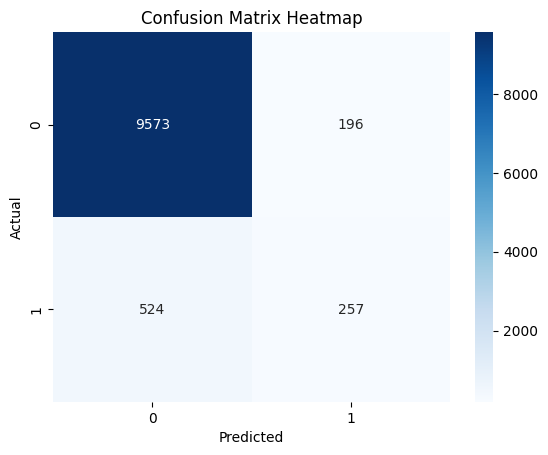

In [153]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.95      0.98      0.96      9769
         yes       0.57      0.33      0.42       781

    accuracy                           0.93     10550
   macro avg       0.76      0.65      0.69     10550
weighted avg       0.92      0.93      0.92     10550



In [165]:
def sigmoid(x):
    result =1/(1+np.exp(-x))
    return result

In [156]:
y=model.predict_proba(x_test)[:,1]

In [157]:
y

array([0.00803459, 0.0237916 , 0.65399864, ..., 0.00127041, 0.00528147,
       0.00257938])

In [158]:
SortInd=np.argsort(y)

In [159]:
SortInd

array([ 742, 1429, 2538, ..., 7249, 6707, 1783])

In [160]:
sortLabel = y_test.iloc[SortInd]

In [161]:
sortLabel

,y
11733,no
694,no
11763,no
18812,no
8498,no
...,...
41081,no
41159,yes
37254,no
37128,yes


In [162]:
sortScore = y[SortInd]
sortScore

array([2.00687482e-04, 2.19177639e-04, 3.20515872e-04, ...,
       9.87250020e-01, 9.89134497e-01, 9.91832750e-01])

In [166]:
x_values = np.linspace(-10,10, 100)
y_sigmoid =  sigmoid(x_values)
y_sigmoid

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

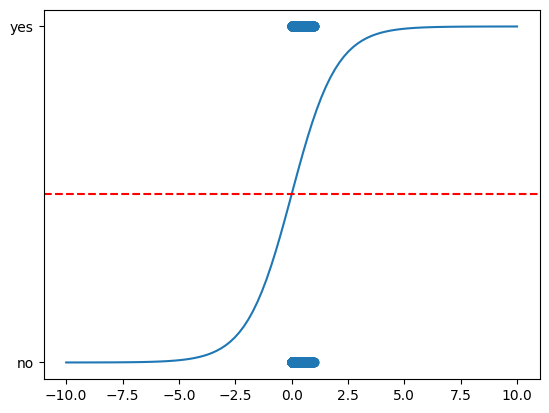

In [167]:
plt.plot(x_values, y_sigmoid)
plt.axhline(y = 0.5, color = 'red', linestyle = '--')
plt.scatter(sortScore,sortLabel)
plt.show()